In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk #a powerful library for working with human language data
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
# DEFINE COLUMN NAMES FOR THE DATASETS
columns = [ 'Movie Name' , 'Genre' , 'Description']
column = ['Movie Name' , 'Description']

In [6]:
# READ THE TRAINING DATA FROM 'train_data.txt' WITH A CUSTOM DELIMITER ':::'
train_data = pd.read_csv('train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TRAINING DATASET
train_data.head()

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
train_data.describe(include='object').T

,count,unique,top,freq
Movie Name,54214,54214,Oscar et la dame rose (2009),1
Genre,54214,27,drama,13613
Description,54214,54086,Grammy - music award of the American academy ...,12


In [8]:
train_data.isnull().sum()

Movie Name     0
Genre          0
Description    0
dtype: int64

In [9]:
# READ THE TEST DATA FROM 'test_data_solution.txt' WITH A CUSTOM DELIMITER ':::'
test_data = pd.read_csv('test_data.txt', delimiter=':::' , engine='python' , names=column , index_col=0 )

# DISPLAY THE FIRST FEW ROWS OF THE TEST DATASET
test_data.head()

,Movie Name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [10]:
test_data.describe(include='object').T

,count,unique,top,freq
Movie Name,54200,54200,Edgar's Lunch (1998),1
Description,54200,54072,Grammy - music award of the American academy ...,10


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie Name   54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [12]:
# CONVERT THE 'DESCRIPTION' COLUMN TO LOWERCASE IN BOTH TRAINING AND TEST DATASETS
train_data.loc[:,'Description'] = train_data['Description'].astype(str).str.lower()
test_data.loc[:,'Description'] = test_data['Description'].astype(str).str.lower()

In [13]:
# DROP THE 'MOVIE NAME' COLUMN FROM BOTH TRAINING AND TEST DATASETS
train_data.drop(columns=['Movie Name'], inplace = True)
test_data.drop(columns=['Movie Name'], inplace = True)

In [14]:
train_data.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [15]:
test_data.head()

,Description
1,"l.r. brane loves his life - his car, his apar..."
2,"spain, march 1964: quico is a very naughty ch..."
3,one year in the life of albin and his family ...
4,"his father has died, he hasn't spoken with hi..."
5,before he was known internationally as a mart...


C:\Users\Admin\AppData\Local\Temp\ipykernel_16628\1391315638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette="YlGnBu")


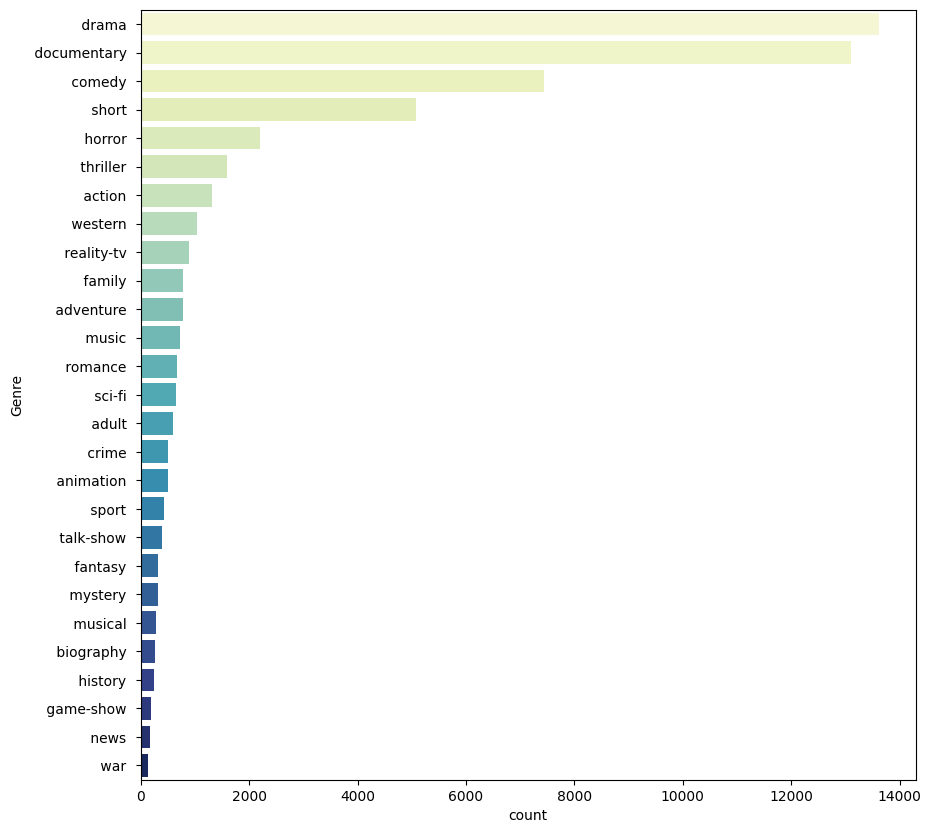

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(data=train_data, y="Genre", order=train_data["Genre"].value_counts().index, palette="YlGnBu")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16628\4245782921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="Genre", order=train_data["Genre"].value_counts().index, palette="YlGnBu")


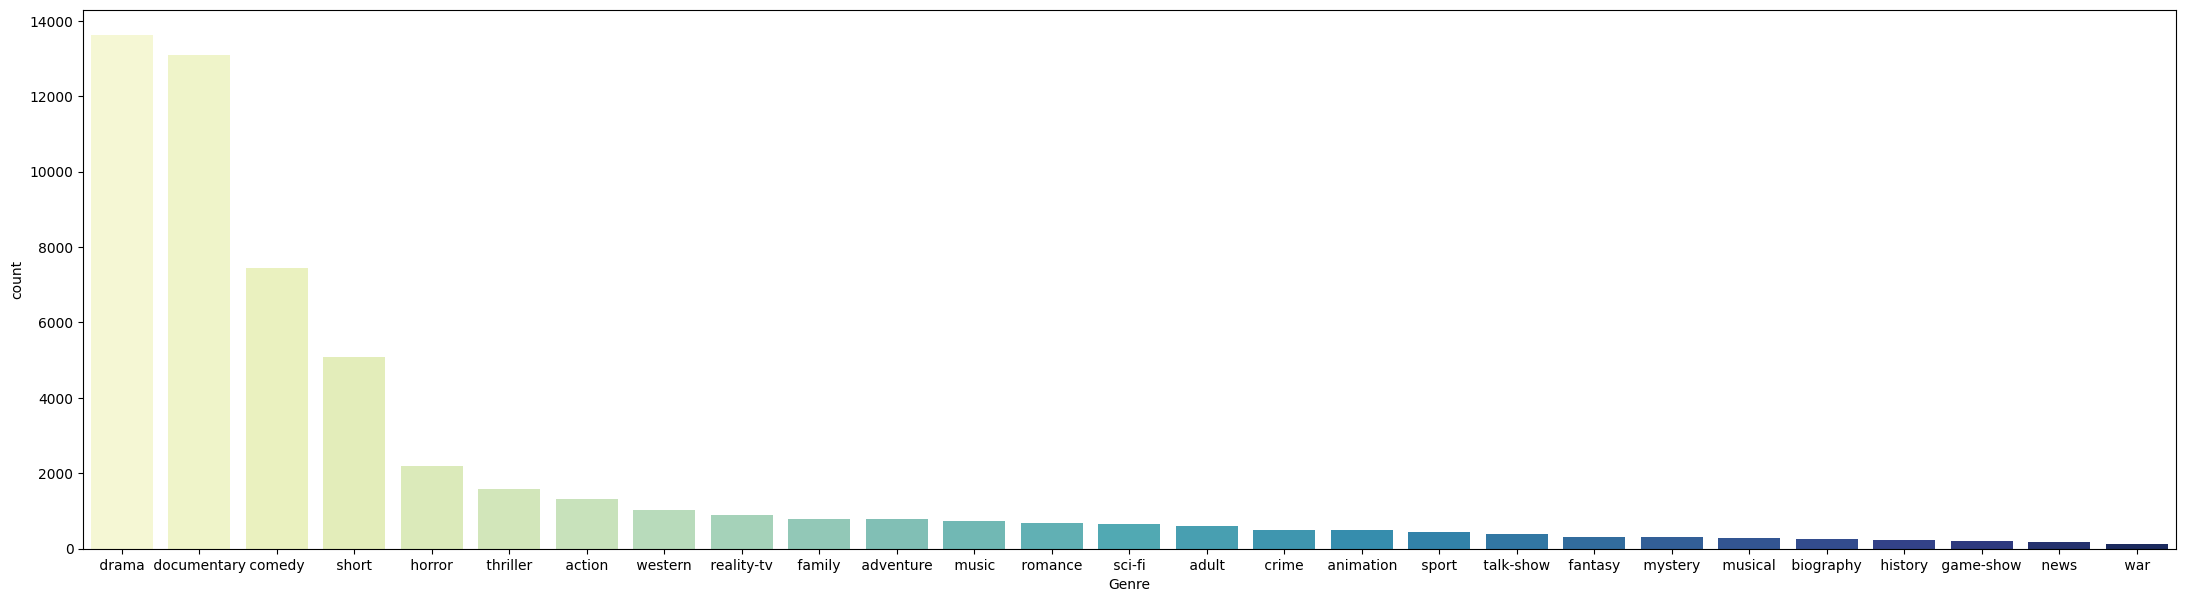

In [17]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="Genre", order=train_data["Genre"].value_counts().index, palette="YlGnBu")
plt.show()

In [18]:
print(train_data["Description"].dtypes)
print(test_data["Description"].dtypes)

object
object


In [19]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["Description"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["Description"].apply(cleaning_data)

In [20]:
train_data.head()

,Genre,Description,TextCleaning
1,drama,listening in to a conversation between his do...,listening conversation doctor parents year old...
2,thriller,a brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,adult,as the bus empties the students for their fie...,bus empties students field trip museum natural...
4,drama,to help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,drama,the film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [21]:
test_data.head()

,Description,TextCleaning
1,"l.r. brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
2,"spain, march 1964: quico is a very naughty ch...",spain march quico naughty child three belongin...
3,one year in the life of albin and his family ...,one year life albin family shepherds north tra...
4,"his father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
5,before he was known internationally as a mart...,known internationally martial arts superstar b...


In [22]:
vectorize = TfidfVectorizer()

x_train = vectorize.fit_transform(train_data["TextCleaning"])
x_test = vectorize.fit_transform(test_data["TextCleaning"])

In [23]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from time import time
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [24]:
y_test = pd.read_csv("test_data_solution.txt",sep=":::",
                       usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
y_test.head()

,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [25]:
x = x_train
y = train_data["Genre"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [26]:
NB = MultinomialNB(alpha=0.015)
start_time = time()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Seconds')

Accuracy : 0.5397952596144978
Running Time :  0.35 Seconds


In [27]:
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

Accuracy : 0.5397952596144978
Running Time :  0.42 Secounds


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
from time import time
import re
import string
import nltk
from googletrans import Translator
from langdetect import detect
import pycountry
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [29]:
train = pd.read_csv("train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
train.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [30]:
test = pd.read_csv("test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test.head()

,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


In [31]:
train.describe(include='object').T

,count,unique,top,freq
Title,54214,54214,Oscar et la dame rose (2009),1
Genre,54214,27,drama,13613
Description,54214,54086,Grammy - music award of the American academy ...,12


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [33]:
train.duplicated().sum()

0

In [34]:
train.Genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [35]:
test.describe(include='object').T

,count,unique,top,freq
Title,54200,54200,Edgar's Lunch (1998),1
Description,54200,54072,Grammy - music award of the American academy ...,10


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 847.0+ KB


In [37]:
test.duplicated().sum()

0

In [38]:
train.loc[train['Description'].str.contains(r'@\S+')].head()

,Title,Genre,Description
242,Túlvilági beszélö (1992),documentary,Mail <svaradi@sprynet.com> for translation. T...
1880,Rokonok (1954),drama,Mail <svaradi@sprynet.com> for translation. F...
1986,Lila akác (1934),comedy,Mail <svaradi@sprynet.com> for translation. S...
6579,A csúnya lány (1935),comedy,Mail <svaradi@sprynet.com> for translation. D...
8296,Füszer és csemege (1940),drama,Mail <svaradi@sprynet.com> for translation. 5...


In [39]:
def detect_language(text):
    try:
        #Returning the name 'English instide of en'
        return pycountry.languages.get(alpha_2=detect(text)).name.lower()
    except:
        return 'Unknown'
train['Language'] = train['Description'].apply(detect_language)
test['Language'] = test['Description'].apply(detect_language)
train.head()

,Title,Genre,Description,Language
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,english
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,english
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,english
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,english
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,english


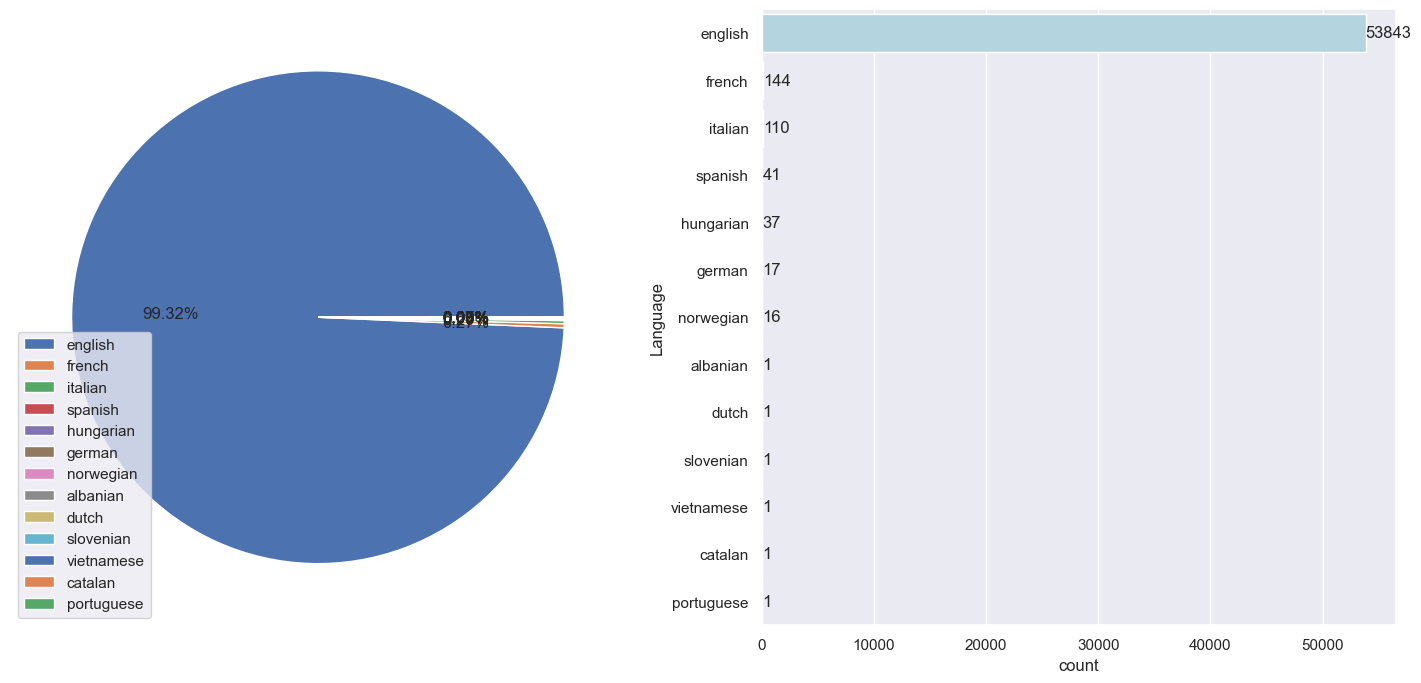

In [40]:
fig,axs = plt.subplots(1,2)
axs[0].pie(train.Language.value_counts().values.tolist(),autopct='%.2f%%')
axs[0].legend(labels=train.Language.value_counts().index.tolist(),loc='lower left')
sns.countplot(data=train,y='Language',order=train.Language.value_counts().index.tolist(),ax=axs[1],color='lightblue')
axs[1].bar_label(axs[1].containers[0])
fig.show()

In [41]:
'''''
We discovered a portion of other languages in our data,
so we will handle
them later by translating them to standard language (english)
in our cleaning function
Descriptions included HTTP links
'''''

train.loc[train['Description'].str.contains(r'http\S+')].shape[0]

9

In [42]:
#For example
train.loc[train['Description'].str.contains(r'http\S+')].head()['Description'].iloc[1]
#So we need to remove them from our text

" There's more to the story of the Clintons and 9/11. Over two nights -- September 10-11, 2006, just four months before Hillary announced the exploratory committee for her original presidential campaign, ABC aired The Path to 9/11, a riveting and factual docudrama. This acclaimed and balanced movie faulted two administrations -- Bill Clinton and George W. Bush. But fairness was not what Hillary wanted. Screenwriter Cyrus Nowrasteh told me he had expected the customary DVD distribution. But the Clintons, fearing the impact of DVD release during her campaign, successfully pressured Disney, which owns ABC, to bury the movie. This is a portion of a news article that originally appeared: http://www.frontpagemag.com/fpm/261541/hillarys-path-back-911-arnold-steinberg This article originally appeared in The Huffington Post http://www.huffingtonpost.com/arnold-steinberg/hillarys-path-back-to-911_b_9039658.html This article was written by Arnold Steinberg from Huffington Post and was legally lic

In [43]:
def clean_text(text):
    # Remove strange pattern in different languages if exist
    text = re.sub('Mail  for translation. ','',text)
    # Remove twitter handles
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuations
    text = re.sub(f'[{string.punctuation}]','',text)
    # Remove numbers
    text = re.sub(f'[{string.digits}]','',text)
    # Remove single charachters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    return text

In [44]:
train['Description'] = train['Description'].apply(clean_text)
test['Description'] = test['Description'].apply(clean_text)

In [45]:
train[~train.Language.isin(['english'])]

,Title,Genre,Description,Language
210,Divorzio alla siciliana (1963),comedy,Il barone Fifě ha bisogno di un erede per ave...,italian
242,Túlvilági beszélö (1992),documentary,Mail svaradi for translation Tollas Tibor az ...,hungarian
282,"""Boogie-woogie 47"" (1980)",drama,En plusieurs familles de Montréal passent lé...,french
678,Pallati 176 (1986),comedy,English comedy by wellknown Albanian theater ...,albanian
806,Iszony (1965),drama,Mail to author for translation Karasz Nelli a...,hungarian
...,...,...,...,...
53697,Fantasmi e ladri (1959),comedy,Annunziata ha letto diecimila gialli spopola ...,italian
53712,Due notti con Cleopatra (1954),comedy,Cleopatra č una donna bellissima ma ha un pic...,italian
53878,Gyilkos kedv (1997),drama,Kora delutan egy iskolabol hazatero kislany c...,hungarian
54165,Az áldozat (1994),documentary,Mail author for translation Az os forradalom ...,hungarian


In [46]:
#Translate other languages
def trans(text):
    try:
        return Translator().translate(text,dest='en').text
    except:
        return text
train.loc[~train['Language'].isin(['english']), 'Description']=train.loc[~train['Language'].isin(['english']),'Description'].apply(trans)
test.loc[~test['Language'].isin(['english']), 'Description']=test.loc[~test['Language'].isin(['english']),'Description'].apply(trans)

In [47]:
train.drop(columns='Language',inplace=True)
test.drop(columns='Language',inplace=True)

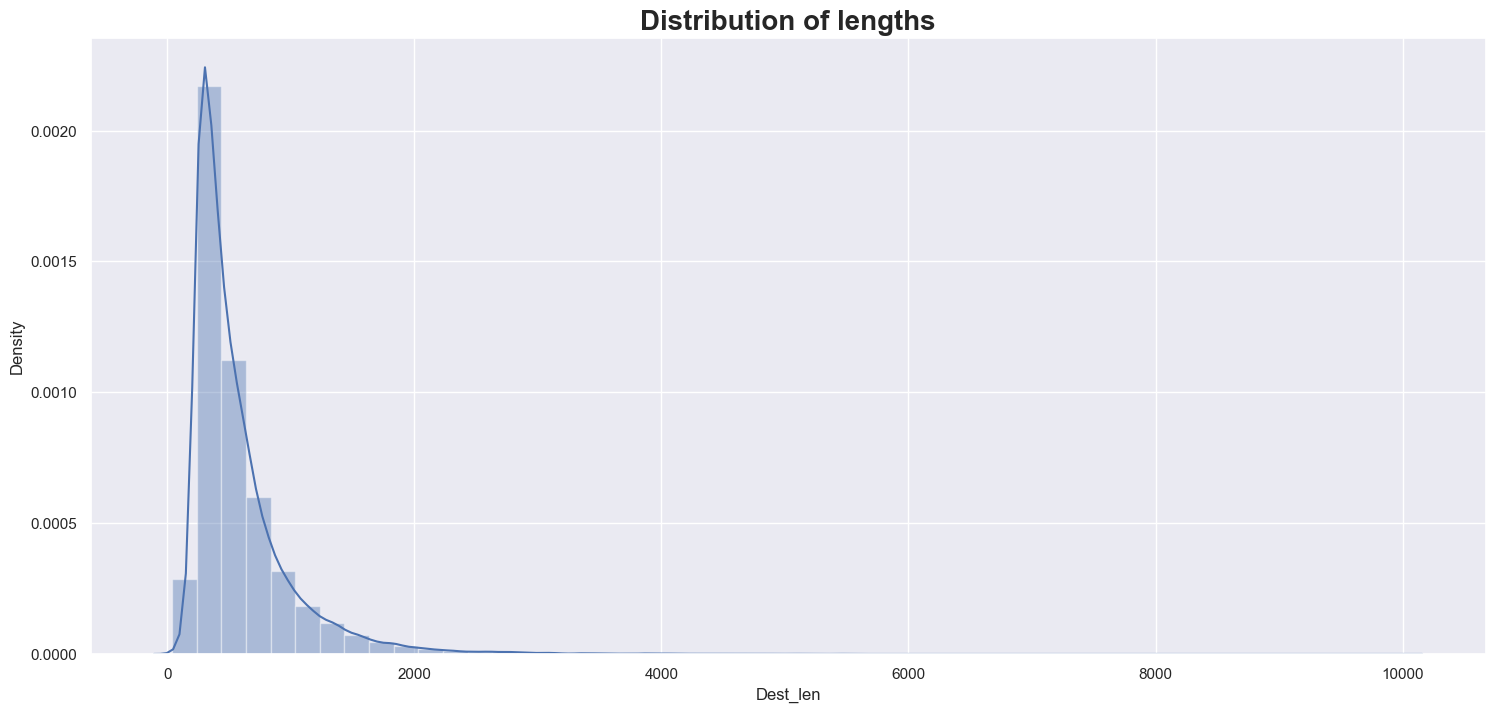

In [48]:
#Distribution of text lengths
train['Dest_len'] = train['Description'].apply(len)
sns.distplot(train['Dest_len'])
plt.title('Distribution of lengths',fontweight='bold',fontsize=20)
plt.show()

In [49]:
# Using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times
x_train = tfidf_vectorizer.fit_transform(train['Description'])
x_test = tfidf_vectorizer.transform(test['Description'])

In [50]:
sampler = RandomOverSampler()
#We will pass to it the output of TfidfVectorizer from train data
x_train_resampled , y_train_resampled = sampler.fit_resample(x_train,train['Genre'])

In [51]:
print('Train :',x_train_resampled.shape[0])
print('Test :',y_train_resampled.shape[0])

Train : 367551
Test : 367551


In [52]:
y_actual = pd.read_csv("test_data_solution.txt",
                      sep=':::',usecols=[2],header=None).rename(columns={2:'Actual_Genre'})
y_actual.head()

,Actual_Genre
0,thriller
1,comedy
2,documentary
3,drama
4,drama


In [53]:
#Naive Bayes Model
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train_resampled,y_train_resampled)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

Accuracy : 0.545129151291513
Running Time :  1.95 Secounds


In [54]:
print(classification_report(y_actual,y_pred))

               precision    recall  f1-score   support

      action        0.37      0.48      0.42      1314
       adult        0.50      0.53      0.51       590
   adventure        0.32      0.24      0.28       775
   animation        0.30      0.22      0.25       498
   biography        0.04      0.03      0.04       264
      comedy        0.57      0.53      0.55      7446
       crime        0.17      0.17      0.17       505
 documentary        0.73      0.72      0.72     13096
       drama        0.64      0.57      0.60     13612
      family        0.25      0.22      0.24       783
     fantasy        0.17      0.15      0.16       322
   game-show        0.78      0.68      0.72       193
     history        0.10      0.07      0.08       243
      horror        0.52      0.68      0.59      2204
       music        0.40      0.72      0.51       731
     musical        0.18      0.10      0.13       276
     mystery        0.15      0.09      0.11       318
        n

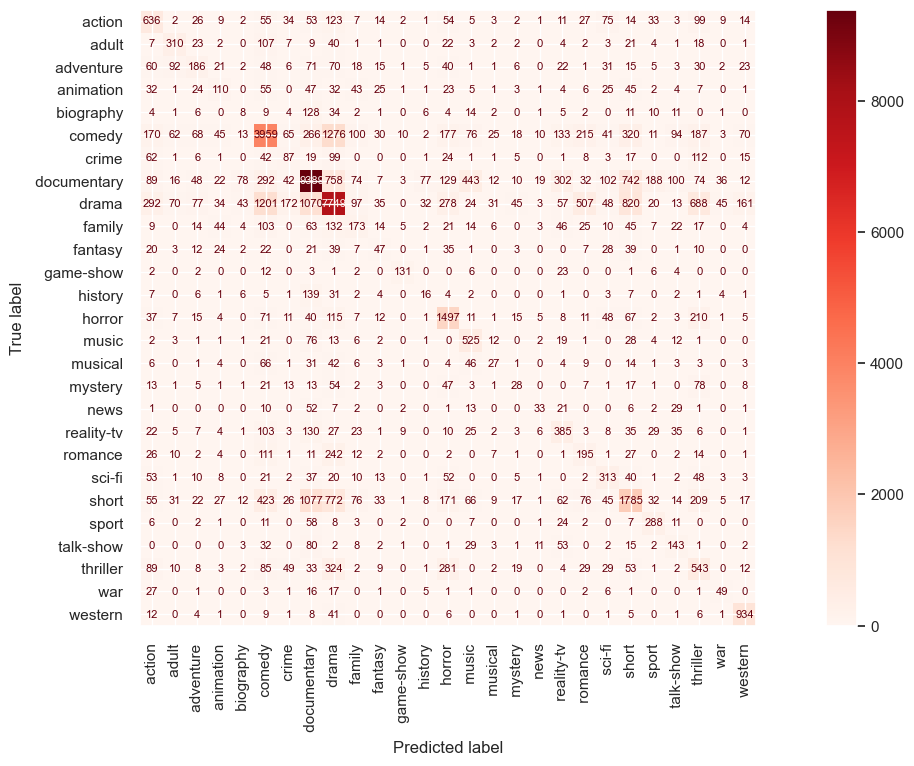

In [55]:
cm =confusion_matrix(y_actual,y_pred,labels=NB.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=NB.classes_)
cmd.plot(cmap=plt.cm.Reds,xticks_rotation='vertical',text_kw={'size': 8})
plt.show()

In [56]:
pd.concat([pd.concat([test,y_actual],axis=1),pd.Series(y_pred)],axis
          =1).rename(columns={0:'Predicted_Genre'}).head(10)

,Title,Description,Actual_Genre,Predicted_Genre
0,Edgar's Lunch (1998),LR Brane loves his life his car his apartmen...,thriller,comedy
1,La guerra de papá (1977),Spain March Quico is very naughty child of t...,comedy,drama
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary,documentary
3,Meu Amigo Hindu (2015),His father has died he hasnt spoken with his ...,drama,drama
4,Er nu zhai (1955),Before he was known internationally as martia...,drama,action
5,Riddle Room (2016),Emily Burns is being held captive in room wit...,horror,thriller
6,L'amica (1969),The beautiful but neglected wife of brilliant...,drama,drama
7,Ina Mina Dika (1989),Vasu Inamdar Ina suffers from disorder where ...,comedy,comedy
8,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,documentary,documentary
9,Press (2011),Press is story of young people overwhelmed by...,drama,short


In [57]:
y_train_modified = train['Genre'].apply(lambda genre: genre
                                        if genre.strip() in ['drama','documentary']
                                        else 'other')
y_actual_modified = y_actual['Actual_Genre'].apply(lambda genre:
                                                   genre if genre.strip() in ['drama','documentary']
                                                   else 'other')

In [64]:
x_train

<54214x59795 sparse matrix of type '<class 'numpy.float64'>'
	with 2353074 stored elements in Compressed Sparse Row format>

In [65]:
y_actual_modified

0                other
1                other
2         documentary 
3               drama 
4               drama 
             ...      
54195            other
54196            other
54197            other
54198           drama 
54199           drama 
Name: Actual_Genre, Length: 54200, dtype: object

In [58]:
NB = MultinomialNB(alpha=0.3)
start_time = time()
NB.fit(x_train,y_train_modified)
y_pred = NB.predict(x_test)
print('Accuracy :',accuracy_score(y_actual_modified,y_pred))
end_time = time()
print('Running Time : ',round(end_time - start_time,2),'Secounds')

Accuracy : 0.6947232472324724
Running Time :  0.22 Secounds


In [59]:
def class_predcit(text):
# Ensure the text is in a list
    text_vec = tfidf_vectorizer.transform([text])

# Predict the genre
    y_pred = NB.predict(text_vec)
    return y_pred


In [60]:

text = 'The documentary focuses on a young woman named Gina. Gina is struggling with pressing, and painful family issues. Her story takes you into the world of a woman who shares personal pain about the child abuse she suffered from her stepfather, her lifestyle, the heartbreaking removal of her children from her home due to family lies. You will witness a very heart-wrenching story that will keep you watching, and rooting for Gina.'
print(class_predcit(text))

[' drama ']


In [61]:
text = 'The documentary focuses on a young woman named Gina. Gina is struggling with pressing, and painful family issues. Her story takes you into the world of a woman who shares personal pain about the child abuse she suffered from her stepfather, her lifestyle, the heartbreaking removal of her children from her home due to family lies. You will witness a very heart-wrenching story that will keep you watching, and rooting for Gina.'

# Ensure the text is in a list
text_vec = tfidf_vectorizer.transform([text])

# Predict probabilities for each class
y_pred_proba = NB.predict_proba(text_vec)

# Print the probabilities for each class
print("Probabilities for each class:")
for genre, prob in zip(NB.classes_, y_pred_proba[0]):
    print(f"{genre}: {prob:.4f}")


Probabilities for each class:
 documentary : 0.1855
 drama : 0.5161
other: 0.2984


In [67]:
import pickle 
# Initialize TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(lowercase=True, #Lowercase chars
                                   ngram_range=(1,1), #Capture only single words in each text(unigrams)
                                   stop_words='english',#Remove stop_words
                                   min_df=2)#Ignore words that appears less than 2 times

# Fit TF-IDF Vectorizer with training data
tfidf_vectorizer.fit(train['Description'])

# Save TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [62]:
# Save Naive Bayes Classifier (NB)
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(NB, f)
